In [43]:
import numpy as np
import matplotlib.pyplot as plt
# from utils import plot_points, plot_decision_boundary
import math

In [44]:
def plot_points(X: np.ndarray, y: np.ndarray) -> None:
    """ 
    Plots a scatter plot of points with two different classes.

    Parameters:
        X (numpy.ndarray): A 2D array of shape (n, 2) containing the coordinates of the points.
        y (numpy.ndarray): A 2D array of shape (n, 1) containing the class labels (0 or 1) for each point.
    """
    plt.figure(figsize=(3, 3))
    plt.scatter(
        X[y.flatten() == 0][:, 0],
        X[y.flatten() == 0][:, 1],
        c="red",
        label="0",
        edgecolors="k",
    )
    plt.scatter(
        X[y.flatten() == 1][:, 0],
        X[y.flatten() == 1][:, 1],
        c="blue",
        label="1",
        edgecolors="k",
    )
    plt.xlabel("X1")
    plt.ylabel("X2")
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


def plot_decision_boundary(X: np.ndarray, y: np.ndarray, W: np.ndarray) -> None:
    """
    Plots the decision boundary along with the scatter plot of points.

    Parameters:
        X (numpy.ndarray): A 2D array of shape (n, 2) containing the coordinates of the points.
        y (numpy.ndarray): A 2D array of shape (n, 1) containing the class labels (0 or 1) for each point.
        W (numpy.ndarray): A 2D array of shape (3, 1) containing the weights of the decision boundary.
    """
    c, x_coeff, y_coeff = W.flatten()
    plt.figure(figsize=(3, 3))
    plt.scatter(
        X[y.flatten() == 0][:, 0],
        X[y.flatten() == 0][:, 1],
        c="red",
        label="0",
        edgecolors="k",
    )
    plt.scatter(
        X[y.flatten() == 1][:, 0],
        X[y.flatten() == 1][:, 1],
        c="blue",
        label="1",
        edgecolors="k",
    )
    plt.xlabel("X1")
    plt.ylabel("X2")
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    x_values = np.linspace(x_min - 1, x_max + 1, 100)
    y_values = (c - x_coeff * x_values) / y_coeff
    plt.plot(x_values, y_values)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


In [45]:
def augment(trainingData:np.array):
        return np.insert(trainingData,0,-1,axis=1)

class perceptron:
    def __init__(self,xtrain:np.array,labels:np.array,x):
        self.x=x
        self.augment=self.augmentTrainingData(xtrain)
        self.labels=labels
        self.trainingData=self.negateZeroClass()
        self.numAttributes=self.trainingData.shape[1]
        self.weights=np.zeros(self.numAttributes)

    def augmentTrainingData(self,trainingData:np.array):
        return np.insert(trainingData,0,-1,axis=1)

    def negateZeroClass(self):
        temp=self.augment.copy()
        zeroClass=np.where(self.labels==0)[0]
        temp[zeroClass] *= -1
        return temp

    # def train(self):
    #     run=1
    #     counter=0 #checking number of iteration
    #     while(run):
    #         counter=counter+1
    #         for xi in self.trainingData:
    #             temp=self.weights @ xi
    #             if temp<=0:
    #                 self.weights=self.weights+xi
    #                 run=1
    #                 break                
    #             if np.array_equal(xi,self.trainingData[-1]):
    #                 run=0
    #                 break
    #             if counter>500:
    #                 print("Number of iterations are now 500, maybe sample isn't linearly separable")
    #                 run=0
    #                 break

    def train(self):
        counter = 0  # Track number of iterations
        max_iterations = 500

        while counter < max_iterations:
            no_update = True  
            for xi in self.trainingData:
                if self.weights @ xi <= 0:  
                    self.weights += xi  
                    no_update = False  
                
            counter += 1

            if no_update:
                break  

        if counter >= max_iterations:
            print("Number of iterations reached 500, maybe the sample isn't linearly separable")


    def outputTheta(self,x):
        prod=self.weights @ x
        temp=np.zeros(len(prod))
        # print(prod)
        for i in range(len(prod)):
            if prod[i]>0:
                temp[i]=1
            else:
                temp[i]=0
        return temp

    # def test(self,testData):
    #     pass

def output_array(output):
        temp =[]
        for i in output:
            temp.append([i])
        return np.array(temp)

def sigmoid(x):
    return 1/(1+ math.pow(math.e,-x))

## Creating Data for all four operators

In [46]:
trainingX=np.array([[0,0],[0,1],[1,0],[1,1]])

nandArray=np.array([1,1,1,0])
norArray=np.array([1,0,0,0])
xorArray=np.array([0,1,1,0])
xnorArray=np.array([1,0,0,1])

x=augment(trainingX)
x=np.transpose(x)

## Nand Training

[[-1 -1 -1 -1]
 [ 0  0  1  1]
 [ 0  1  0  1]]
[-4. -3. -2.]
[1. 1. 1. 0.]


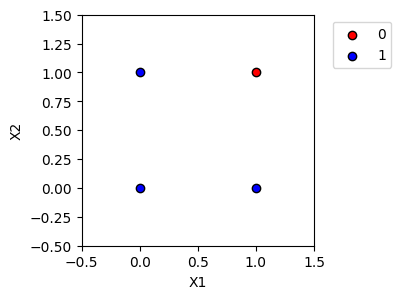

Output


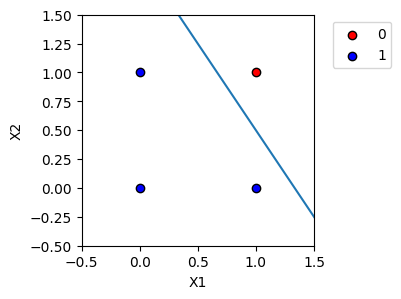

In [47]:
nandPerceptron=perceptron(trainingX,nandArray,x)
nandPerceptron.train()
print(x)
print(nandPerceptron.weights)
print(nandPerceptron.outputTheta(x))

plot_points(trainingX,output_array(nandArray))
print("Output")
plot_decision_boundary(trainingX,output_array(nandArray),output_array(nandPerceptron.weights))

## Nor Training


[-1. -2. -2.]
[1. 0. 0. 0.]


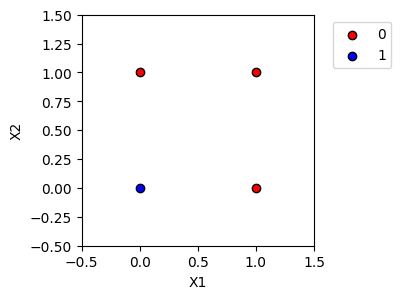

Output


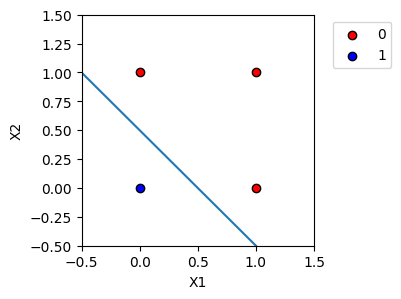

In [48]:
norPerceptron=perceptron(trainingX,norArray,x)
norPerceptron.train()
print(norPerceptron.weights)
print(norPerceptron.outputTheta(x))

plot_points(trainingX,output_array(norArray))
print("Output")
plot_decision_boundary(trainingX,output_array(norArray),output_array(norPerceptron.weights))

## XOR training

Number of iterations reached 500, maybe the sample isn't linearly separable
[0. 0. 0.]
[0. 0. 0. 0.]


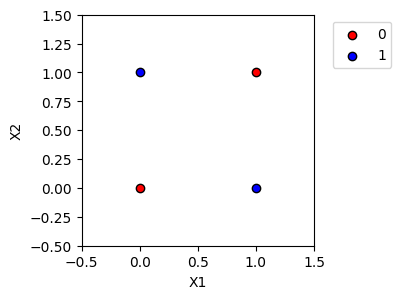

Output


/tmp/ipykernel_870/528196140.py:66: RuntimeWarning: invalid value encountered in divide
  y_values = (c - x_coeff * x_values) / y_coeff


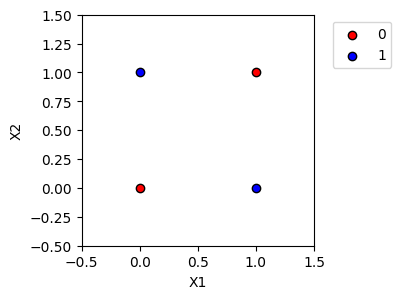

In [49]:
xorPerceptron=perceptron(trainingX,xorArray,x)
xorPerceptron.train()
print(xorPerceptron.weights)
print(xorPerceptron.outputTheta(x))

plot_points(trainingX,output_array(xorArray))
print("Output")
plot_decision_boundary(trainingX,output_array(xorArray),output_array(xorPerceptron.weights))

## XNOR training

Number of iterations reached 500, maybe the sample isn't linearly separable
[0. 0. 0.]
[0. 0. 0. 0.]


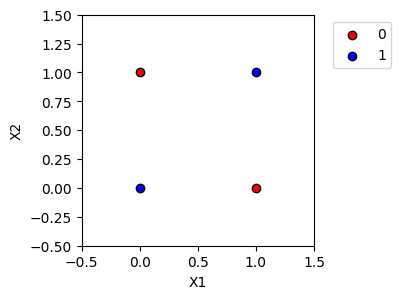

Output


/tmp/ipykernel_870/528196140.py:66: RuntimeWarning: invalid value encountered in divide
  y_values = (c - x_coeff * x_values) / y_coeff


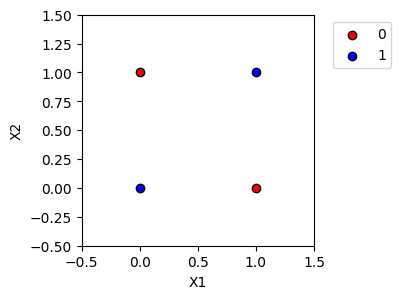

In [50]:
xnorPerceptron=perceptron(trainingX,xnorArray,x)
xnorPerceptron.train()
print(xnorPerceptron.weights)
print(xnorPerceptron.outputTheta(x))

plot_points(trainingX,output_array(xnorArray))
print("Output")
plot_decision_boundary(trainingX,output_array(xnorArray),output_array(xnorPerceptron.weights))

## Gradient Descent

In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_descent(X, y, loss_function, lr=0.1, epochs=100000):
    m, n = X.shape
    W = np.random.randn(n, 1) * 0.01  # Small weight initialization
    losses = []
    
    for epoch in range(epochs):
        z = X @ W
        y_pred = sigmoid(z)
        
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)  # Prevent extreme values
        
        ce_loss = cross_entropy_loss(y, y_pred)
        mse_loss_value = mse_loss(y, y_pred)
        
        if loss_function == "cross_entropy":
            loss = ce_loss
            grad = X.T @ (y_pred - y) / m
        elif loss_function == "mse":
            loss = mse_loss_value
            grad = X.T @ ((y_pred - y) * y_pred * (1 - y_pred)) / m
        # print(grad)
        W -= lr * grad
        losses.append(loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, CE Loss: {ce_loss:.5f}, MSE Loss: {mse_loss_value:.5f}")

    print(f"Final Weights ({loss_function}): \n{W}")
    return W, losses

In [71]:
def outputSigmoid(weights,x):
  x = np.array(x).reshape(-1, 1)  
  prod = np.dot(weights.T, x)  
  return int(sigmoid(prod) > 0.9)

  # prod=weights @ x
  # return int(sigmoid(prod) > 0.9)

  # print(prod)
  # if sigmoid(prod)>0.9:
  #   return 1
  # else:
  #   return 0
            
def output_array_sigmoid(weights,trainingData):
  temp=[]
  # weights=weights.flatten()
  for i in range(len(trainingData)):
    temp.append(outputSigmoid(weights,trainingData[i]))
  return temp

In [75]:
np.random.seed(0)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
X_bias = np.hstack([np.array([[-1],[-1],[-1],[-1]]), X])
print(X_bias)
y_xor = np.array([[0], [1], [1], [0]])
y_nand = np.array([[1], [1], [1], [0]])
y_nor = np.array([[1], [0], [0], [0]])
y_xnor = np.array([[1], [0], [0], [1]])

for y in [y_xnor,y_nor,y_nand,y_xor]:
    print("For y=",y)
    for loss_func in ["cross_entropy", "mse"]:
        W, losses = gradient_descent(X_bias, y, loss_function=loss_func)
        print(X_bias)
        # print(W)
        # print(output_array_sigmoid(W,X_bias))

[[-1  0  0]
 [-1  0  1]
 [-1  1  0]
 [-1  1  1]]
For y= [[1]
 [0]
 [0]
 [1]]
Epoch 0, CE Loss: 0.69317, MSE Loss: 0.25001
Epoch 100, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 900, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1000, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1100, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1900, CE Loss: 0.

Epoch 0, CE Loss: 0.69894, MSE Loss: 0.25290
Epoch 100, CE Loss: 0.59721, MSE Loss: 0.20278
Epoch 200, CE Loss: 0.54477, MSE Loss: 0.17846
Epoch 300, CE Loss: 0.50550, MSE Loss: 0.16072
Epoch 400, CE Loss: 0.47307, MSE Loss: 0.14615
Epoch 500, CE Loss: 0.44553, MSE Loss: 0.13392
Epoch 600, CE Loss: 0.42180, MSE Loss: 0.12357
Epoch 700, CE Loss: 0.40109, MSE Loss: 0.11473
Epoch 800, CE Loss: 0.38281, MSE Loss: 0.10710
Epoch 900, CE Loss: 0.36655, MSE Loss: 0.10045
Epoch 1000, CE Loss: 0.35196, MSE Loss: 0.09459
Epoch 1100, CE Loss: 0.33877, MSE Loss: 0.08938
Epoch 1200, CE Loss: 0.32678, MSE Loss: 0.08472
Epoch 1300, CE Loss: 0.31582, MSE Loss: 0.08050
Epoch 1400, CE Loss: 0.30575, MSE Loss: 0.07668
Epoch 1500, CE Loss: 0.29644, MSE Loss: 0.07318
Epoch 1600, CE Loss: 0.28782, MSE Loss: 0.06998
Epoch 1700, CE Loss: 0.27980, MSE Loss: 0.06702
Epoch 1800, CE Loss: 0.27232, MSE Loss: 0.06429
Epoch 1900, CE Loss: 0.26531, MSE Loss: 0.06176
Epoch 2000, CE Loss: 0.25874, MSE Loss: 0.05940
Epoc

/tmp/ipykernel_870/1793486132.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(sigmoid(prod) > 0.9)


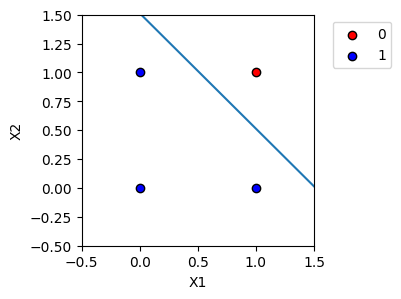

In [76]:
loss_func="mse"
W, losses = gradient_descent(X_bias, y_nand, loss_function=loss_func)
print(output_array_sigmoid(W,X_bias))
plot_decision_boundary(X,y_nand,W)

Epoch 0, CE Loss: 0.69320, MSE Loss: 0.25002
Epoch 100, CE Loss: 0.69316, MSE Loss: 0.25000
Epoch 200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 900, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1000, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1100, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1900, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 2000, CE Loss: 0.69315, MSE Loss: 0.25000
Epoc

/tmp/ipykernel_870/1793486132.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(sigmoid(prod) > 0.9)


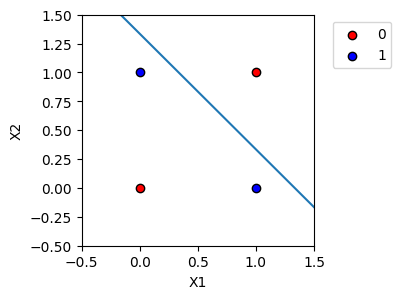

In [77]:
W, losses = gradient_descent(X_bias, y_xor, loss_function=loss_func)
print(output_array_sigmoid(W,X_bias))
plot_decision_boundary(X,y_xor,W)

Epoch 0, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 100, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 900, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1000, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1100, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1200, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1300, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1400, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1500, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1600, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1700, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1800, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 1900, CE Loss: 0.69315, MSE Loss: 0.25000
Epoch 2000, CE Loss: 0.69315, MSE Loss: 0.25000
Epoc

/tmp/ipykernel_870/1793486132.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(sigmoid(prod) > 0.9)


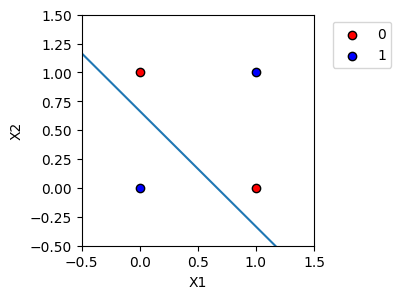

In [78]:
W, losses = gradient_descent(X_bias, y_xnor, loss_function=loss_func)
print(output_array_sigmoid(W,X_bias))
plot_decision_boundary(X,y_xnor,W)

Epoch 0, CE Loss: 0.69767, MSE Loss: 0.25226
Epoch 100, CE Loss: 0.47843, MSE Loss: 0.14966
Epoch 200, CE Loss: 0.42040, MSE Loss: 0.12804
Epoch 300, CE Loss: 0.38769, MSE Loss: 0.11594
Epoch 400, CE Loss: 0.36292, MSE Loss: 0.10621
Epoch 500, CE Loss: 0.34213, MSE Loss: 0.09768
Epoch 600, CE Loss: 0.32395, MSE Loss: 0.09007
Epoch 700, CE Loss: 0.30774, MSE Loss: 0.08328
Epoch 800, CE Loss: 0.29314, MSE Loss: 0.07722
Epoch 900, CE Loss: 0.27990, MSE Loss: 0.07180
Epoch 1000, CE Loss: 0.26783, MSE Loss: 0.06694
Epoch 1100, CE Loss: 0.25681, MSE Loss: 0.06259
Epoch 1200, CE Loss: 0.24670, MSE Loss: 0.05866
Epoch 1300, CE Loss: 0.23740, MSE Loss: 0.05512
Epoch 1400, CE Loss: 0.22883, MSE Loss: 0.05191
Epoch 1500, CE Loss: 0.22092, MSE Loss: 0.04899
Epoch 1600, CE Loss: 0.21358, MSE Loss: 0.04634
Epoch 1700, CE Loss: 0.20678, MSE Loss: 0.04391
Epoch 1800, CE Loss: 0.20044, MSE Loss: 0.04168
Epoch 1900, CE Loss: 0.19454, MSE Loss: 0.03964
Epoch 2000, CE Loss: 0.18902, MSE Loss: 0.03776
Epoc

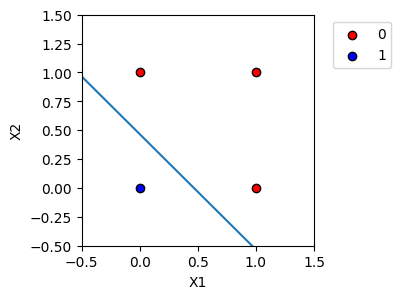

In [79]:
W, losses = gradient_descent(X_bias, y_nor, loss_function=loss_func)
plot_decision_boundary(X,y_nor,W)